In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from fpdf import FPDF

In [6]:
df = pd.read_csv('/Users/jdickinson/Documents/PersonalRepos/cwu-fitlab/data/final/fitlab_data.csv', index_col=0)

# Insights

1.  Number of people who came this quarter
2.  Highest Vo2max (m/f)
3. Absolute difference between skin fold and gold standard
4. Lowestv bf% (m/f)
5. concordance plot between calipers and bod pod/hydro
6. Max push ups
7. All distributions?

In [7]:
def box_plot(df, x: str, y: str, save: bool):

    box_pal = {"F": "#FF5050", "M": '#D1D1D1'}
    strip_pal = {"F": '#000000', "M": "#FF5050"}

    sns.set_style("ticks")
    ax = sns.boxplot(data=df, x=x, y=y, palette=box_pal)
    sns.stripplot(data=df, x=x, y=y, ax=ax, palette=strip_pal)

    if save:
        plt.savefig(f'./reports/figs/{x}{y[0:3]}.png')
    return

In [ ]:
def bar_plot(df, x: str, y: str, save: bool):

    plt.bar(x, y, edgecolor='#000000')
    plt.xticks(df[x])
    
    if save:
        plt.savefig(f'./reports/figs/{x}_count.png')
    return

In [ ]:
def bar_plot(df, x: str, save: bool):

    # pallete
    bar_pal = {"F": "#FF5050", "M": '#D1D1D1'}

    # fig
    fig, ax = plt.subplots()
    sns.set_style("ticks")
    ax = sns.barplot(data=df, x=x, palette=bar_pal)
    plt.setp(ax.patches, linewidth=5)
    
    if save:
        plt.savefig(f'./reports/figs/{x}_count.png')
    return

In [16]:
dates = list(df['Visit Date'])

date_object = datetime.strptime(dates[0], '%Y-%m-%d').date()

In [21]:
df['Visit Date'] = pd.to_datetime(df['Visit Date'], format='%Y-%m-%d')

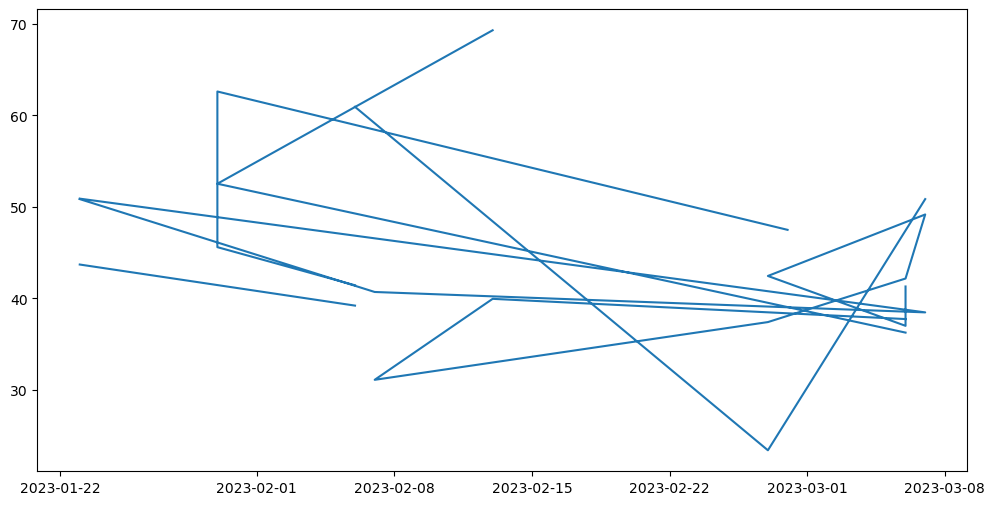

In [31]:

fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df['Visit Date'], df['VO2Max (ml/kg/min)'])

In [33]:
visit_mean_df = df.groupby(['Visit Date']).mean()

/var/folders/0r/_6trl51948x_vd90czsk02t40000gq/T/ipykernel_15227/191839741.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  visit_mean_df = df.groupby(['Visit Date']).mean()


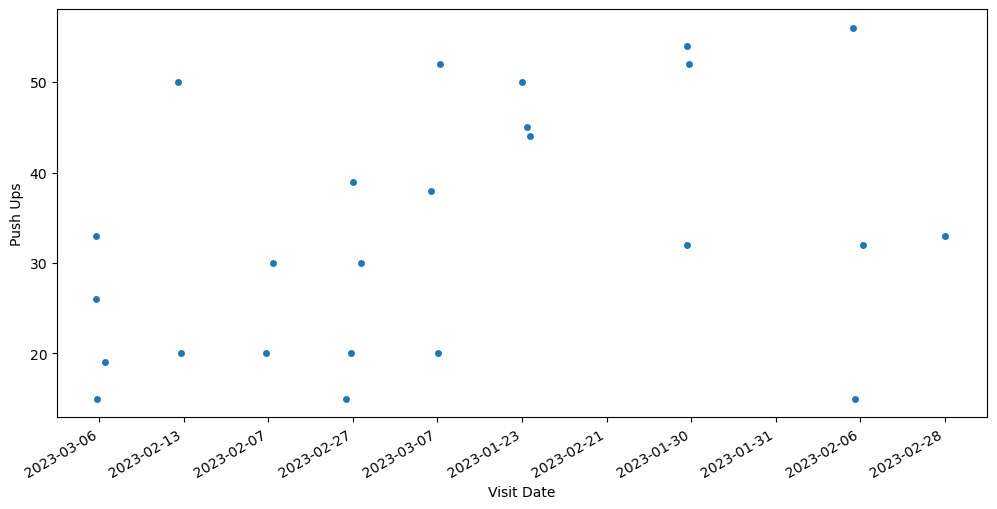

In [45]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.stripplot(data=df, x=df['Visit Date'], y=df['Push Ups'])
fig.autofmt_xdate()

In [36]:
sns.scatterplot(data=df, x=df['Alternate Method'], y=df['Body Fat (%)'])

DatetimeIndex(['2023-01-23', '2023-01-30', '2023-01-31', '2023-02-06',
               '2023-02-07', '2023-02-13', '2023-02-21', '2023-02-27',
               '2023-02-28', '2023-03-06', '2023-03-07'],
              dtype='datetime64[ns]', name='Visit Date', freq=None)